In [1]:
import numpy as np
import pandas as pd
from decimal import Decimal
import matplotlib.pyplot as plt

In [3]:
#Importing csv file with already calculated returns
StockReturns = pd.read_csv('BIGRETURNS.csv')
#Adjusting towards our own prefferences, also avoiding mistakes by chosing format of datetime
StockReturns['Date'] = pd.to_datetime(StockReturns['Date'], format='%d/%m/%Y')

In [4]:
StockReturns.head()

,Date,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
0,2017-01-03,0.002849,0.007081,0.006980,0.005468,0.010894,0.005068,0.002848,0.015732,0.011521
1,2017-01-04,-0.001119,-0.004474,-0.011002,-0.001640,0.001844,0.004657,0.000316,0.015660,-0.005811
2,2017-01-05,0.005085,0.000000,-0.014907,0.010463,-0.009205,0.030732,-0.005678,0.016682,-0.002806
3,2017-01-06,0.011148,0.008668,-0.000565,-0.004792,0.000116,0.019912,0.002855,0.022707,-0.019924
4,2017-01-09,0.009159,-0.003183,-0.016497,-0.000172,0.000697,0.001168,-0.004745,0.012074,-0.012585


In [5]:
# The idea about using DF instead ofsrd coding, and eliminating Date ?
StockReturnValues = StockReturns.loc[:, StockReturns.columns !='Date']

In [6]:
# it usually appeared to be mistaken to try to keep date, as two different operands can't be used together
StockReturnValues.head()


,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
0,0.002849,0.007081,0.006980,0.005468,0.010894,0.005068,0.002848,0.015732,0.011521
1,-0.001119,-0.004474,-0.011002,-0.001640,0.001844,0.004657,0.000316,0.015660,-0.005811
2,0.005085,0.000000,-0.014907,0.010463,-0.009205,0.030732,-0.005678,0.016682,-0.002806
3,0.011148,0.008668,-0.000565,-0.004792,0.000116,0.019912,0.002855,0.022707,-0.019924
4,0.009159,-0.003183,-0.016497,-0.000172,0.000697,0.001168,-0.004745,0.012074,-0.012585


In [7]:
market_capitalizations = np.array([601.51, 469.25, 349.5, 310.48, 299.77, 356.94, 268.88, 331.57, 246.09])

In [8]:
# Calculate the market cap weights by dividing by addition of market caps
mcap_weights = market_capitalizations/sum(market_capitalizations)

In [9]:
mcap_weights

array([0.18599625, 0.1450994 , 0.10807084, 0.09600524, 0.09269355,
       0.1103714 , 0.08314188, 0.1025266 , 0.07609485])

In [10]:
# Calculate the market cap weighted portfolio returns 
# We create new column StockReturns['Portfolio_Mcap'] by multiplication of all stocks by axis 1 
StockReturns['Portfolio_MCap'] = StockReturnValues.iloc[:, 0:9].mul(mcap_weights, axis=1).sum(axis=1)


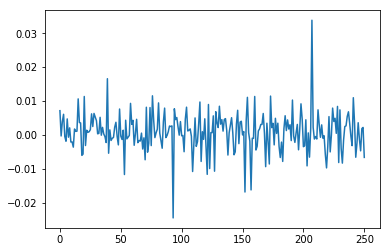

In [12]:
StockReturns['Portfolio_MCap'].plot()

In [28]:
#adjusting it to cumulative shape
StockReturns['Portfolio_MCap'] = StockReturnValues.iloc[:, 0:9].mul(mcap_weights, axis=1).sum(axis=1)


In [30]:
CumulativeReturnsMCap = StockReturns['Portfolio_MCap']

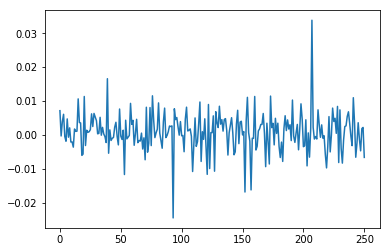

In [32]:
CumulativeReturnsMCap.plot()

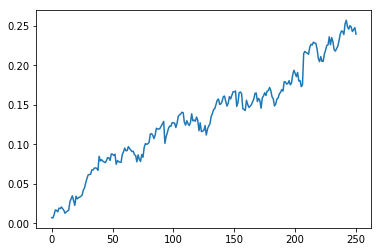

In [35]:
# Plot the cumulative portfolio returns in market cap over time
CumulativeReturns = ((1+StockReturns["Portfolio_MCap"]).cumprod()-1)
CumulativeReturns.plot()
plt.show()

In [36]:
StockReturns

,Date,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T,Portfolio_MCap
0,2017-01-03,0.002849,0.007081,0.006980,0.005468,0.010894,0.005068,0.002848,0.015732,0.011521,0.007132
1,2017-01-04,-0.001119,-0.004474,-0.011002,-0.001640,0.001844,0.004657,0.000316,0.015660,-0.005811,-0.000329
2,2017-01-05,0.005085,0.000000,-0.014907,0.010463,-0.009205,0.030732,-0.005678,0.016682,-0.002806,0.003903
3,2017-01-06,0.011148,0.008668,-0.000565,-0.004792,0.000116,0.019912,0.002855,0.022707,-0.019924,0.006068
4,2017-01-09,0.009159,-0.003183,-0.016497,-0.000172,0.000697,0.001168,-0.004745,0.012074,-0.012585,-0.000478
5,2017-01-10,0.001008,-0.000319,-0.012753,-0.001032,0.002901,-0.001280,-0.002861,-0.004404,0.000245,-0.001879
6,2017-01-11,0.005373,0.009103,0.010241,-0.012311,0.007521,0.003920,0.003188,0.013993,-0.004901,0.004702
7,2017-01-12,-0.004175,-0.009179,-0.005414,-0.000959,-0.009646,0.018297,-0.002542,0.004203,0.009850,-0.000691
8,2017-01-13,-0.001761,0.001437,0.000116,-0.000174,0.005334,0.004302,-0.000956,0.013584,-0.001219,0.002067
9,2017-01-17,0.008065,-0.002711,0.011697,0.002356,-0.036332,-0.009081,-0.002870,-0.003662,0.003662,-0.002109
